In [1]:
from math import pi, prod
from oscar import Landscape, QiskitExecutor, BPReconstructor, BPDNReconstructor
import numpy as np
import networkx as nx
from qiskit.algorithms.optimizers import COBYLA
from qiskit_aer.primitives import Sampler
from qiskit.algorithms.minimum_eigensolvers import QAOA
from qiskit.utils import algorithm_globals
from qiskit_optimization.applications import Maxcut
import matplotlib.pyplot as plt

In [2]:
n = 8
p = 2
seed = 42
beta_resolution, gamma_resolution = 10, 10
beta_bounds, gamma_bounds = (-pi / 8, pi / 8), (-pi / 4, pi / 4)
sampling_fraction = 1 / 10

In [3]:
graph = nx.random_regular_graph(3, n, seed)
problem = Maxcut(graph).to_quadratic_program()
H, offset = problem.to_ising()

In [4]:
algorithm_globals.random_seed = seed
algorithm = QAOA(Sampler(run_options={'seed': seed}), COBYLA(), reps=p)

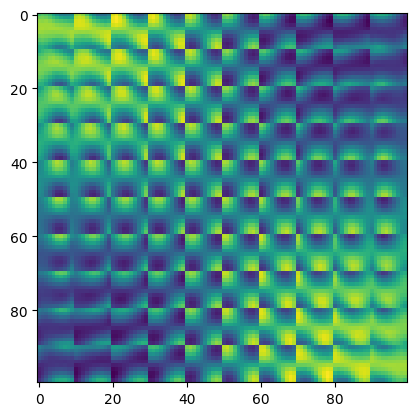

In [5]:
landscape = Landscape([beta_resolution] * p + [gamma_resolution] * p, [beta_bounds] * p + [gamma_bounds] * p)
landscape.run_all(QiskitExecutor(algorithm, H))
plt.imshow(landscape.true_landscape.reshape(prod(landscape.shape[:p]), -1))

/home/hao/.pyenv/versions/3.10.11/envs/quantum3.10/lib/python3.10/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


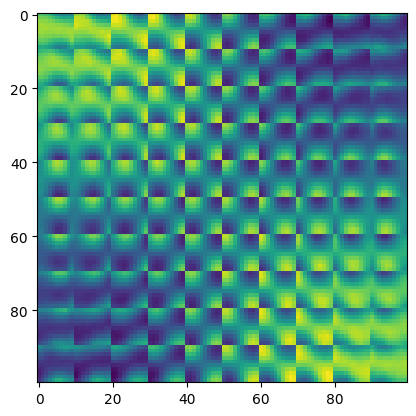

In [6]:
landscape.sample_and_run(QiskitExecutor(algorithm, H), sampling_fraction)
landscape.reconstruct(BPDNReconstructor())
plt.imshow(landscape.reconstructed_landscape.reshape(prod(landscape.shape[:p]), -1))